---

#Human versus AI Distinguishment

##Group 2 - AAI-590: Capstone Project

##Jason Raimondi, Shane Schipper, and Jeremy Cryer

##2024-04-15

###AAI590_Group2_Human_versus_AI.ipynb

###Data Source:

Kaggle - AI Vs Human Text

https://www.kaggle.com/datasets/shanegerami/ai-vs-human-text

Kaggle - Detect- AI Generated VS Student Generated Text

https://www.kaggle.com/datasets/prajwaldongre/llm-detect-ai-generated-vs-student-generated-text

###GitHub Repository:

https://github.com/jeraimondi/aai-capstone-ai-content-detector

---

# Install Required Packages

In [ ]:
# ...

# Load Required Libraries

In [ ]:
import nltk # natural language tool kit
import matplotlib.pyplot as plt # plotting
import numpy as np # array manipulation
import pandas as pd # data analysis
import spacy # natural language processing
from nltk.tokenize import word_tokenize # tokenizer
from pandas import option_context # context manager
from wordcloud import WordCloud # word cloud visualization

# Data Exploration

## Load and Display Datasets

### Load Datasets

In [ ]:
# define path to local dataset csv files
path_dataset_ai_human = '/content/data/AI_Human.csv'
path_dataset_ai_student = '/content/data/LLM.csv'

# read csv files into dataframes
df_ai_human = pd.read_csv(path_dataset_ai_human)
df_ai_student = pd.read_csv(path_dataset_ai_student)

### Display AI vs Human Dataset

In [ ]:
# display ai vs human dataframe
display(df_ai_human)

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0
...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0
487231,The whole purpose of democracy is to create a ...,0.0
487232,I firmly believe that governments worldwide sh...,1.0
487233,I DFN't agree with this decision because a LFT...,0.0


### Display AI vs Student Dataset

In [ ]:
# display ai vs student dataframe
display(df_ai_student)

,Text,Label
0,y r u always l8 to the meetings?,student
1,The project team embraced a user-centric desig...,ai
2,"i dont like dealing with risks, it's too stres...",student
3,"i dont worry about reliability, it's good enough",student
4,"i dont care about human-centered design, just ...",student
...,...,...
1098,The development of quantum encryption ensures ...,ai
1099,"i dont care about social media, just give me t...",student
1100,"i dont care about multi-method approaches, jus...",student
1101,"i dont understand variables, just give me the ...",student


## Initial Preprocessing

### Standardize Column Headers

In [ ]:
# rename columns
df_ai_human.rename(mapper={'generated': 'label'}, axis=1, inplace=True)
df_ai_student.rename(mapper={'Text': 'text', 'Label': 'label'}, axis=1, inplace=True)

### Print Column Headers

In [ ]:
# print column names to confirm renames
print('Column Headers:')
print('---------------')
print('AI_Human Columns:', df_ai_human.columns.tolist())
print('AI_Student Columns:', df_ai_student.columns.tolist())

Column Headers:
---------------
AI_Human Columns: ['text', 'label']
AI_Student Columns: ['text', 'label']


### Check for Missing Values

In [ ]:
# print sum of missing values for each column
print('AI_Human Missing Values:')
print('------------------------')
print(df_ai_human.isna().sum())

# print sum of missing values for each column
print('\nAI_Student Missing Values:')
print('--------------------------')
print(df_ai_student.isna().sum())

AI_Human Missing Values:
------------------------
text     0
label    0
dtype: int64

AI_Student Missing Values:
--------------------------
text     0
label    1
dtype: int64


### Drop Missing Values

In [ ]:
# drop na for ai_student dataframe
df_ai_student.dropna(inplace=True)

# verify that missing values were dropped
print('AI_Student Missing Values:')
print('--------------------------')
print(df_ai_student.isna().sum())

AI_Student Missing Values:
--------------------------
text     0
label    0
dtype: int64


### Standardize Labels

In [ ]:
# convert ai_student labels to numeric format
df_ai_student['label'] = df_ai_student['label'].apply(lambda x: 0.0 if x == 'student' else 1.0)

### Print Unique Labels

In [ ]:
# print unique label values from each dataframe
print('Unique Label Values:')
print('--------------------')
print('AI_Human Unique Labels:', df_ai_human['label'].unique())
print('AI_Student Unique Labels:', df_ai_student['label'].unique())

Unique Label Values:
--------------------
AI_Human Unique Labels: [0. 1.]
AI_Student Unique Labels: [0. 1.]


## Display Samples of Text

In [ ]:
# define function to print dataframe samples
# using option_context to extend width of columns
def fcn_display_df_samples(df, num_samples, max_colwidth):
    with option_context('display.max_colwidth', max_colwidth):
        display(df[['text', 'label']].head(num_samples))

### Display AI vs Human Samples

In [ ]:
# call function to display samples
print('AI vs Human Dataframe Samples:')
print('------------------------------')
fcn_display_df_samples(df_ai_human, num_samples=5, max_colwidth=5000)

AI vs Human Dataframe Samples:
------------------------------


text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article, "Paris bans driving due to smog," by Robert Duffer says, how Paris, after days of nearrecord pollution, enforced a partial driving ban to clear the air of the global city. It also says, how on Monday, motorist with evennumbered license plates were ordered to leave their cars at home or be fined a 22euro fine 31. The same order would be applied to oddnumbered plates the following day. Cars are the reason for polluting entire cities like Paris. This shows how bad cars can be because, of all the pollution that they can cause to an entire city.\n\nLikewise, in the article, "Carfree day is spinning into a big hit in Bogota," by Andrew Selsky says, how programs that's set to spread to other countries, millions of Columbians hiked, biked, skated, or took the bus to work during a carfree day, leaving streets of this capital city eerily devoid of traffic jams. It was the third straight year cars have been banned with only buses and taxis permitted for the Day Without Cars in the capital city of 7 million. People like the idea of having carfree days because, it allows them to lesson the pollution that cars put out of their exhaust from people driving all the time. The article also tells how parks and sports centers have bustled throughout the city uneven, pitted sidewalks have been replaced by broad, smooth sidewalks rushhour restrictions have dramatically cut traffic and new restaurants and upscale shopping districts have cropped up. Having no cars has been good for the country of Columbia because, it has aloud them to repair things that have needed repairs for 

### Display AI vs Student Samples

In [ ]:
# call function to display samples
print('AI vs Student Dataframe Samples:')
print('------------------------------')
fcn_display_df_samples(df_ai_student, num_samples=15, max_colwidth=5000)

AI vs Student Dataframe Samples:
------------------------------


,text,label
0,y r u always l8 to the meetings?,0.0
1,The project team embraced a user-centric design approach for product development.,1.0
2,"i dont like dealing with risks, it's too stressful",0.0
3,"i dont worry about reliability, it's good enough",0.0
4,"i dont care about human-centered design, just give me the final product",0.0
5,The study's methodology ensured a representative sample across demographics.,1.0
6,"i dont care about industry practices, just give me the solution",0.0
7,The project team documented all processes for transparency.,1.0
8,The project team maintained open lines of communication.,1.0
9,The findings are consistent with existing theoretical frameworks.,1.0


# Text Preprocessing

For preprocessing, we will perfom the following:
1.   Tokenization of each text
2.   Strip leading/trailing whitespace from each token
3.   Change all characters to lower case
4.   Remove new line characters (i.e., '\n')
5.   Remove other unwanted characters (i.e., '`')
6.   Remove stop words
7.   Remove punctuation

We will now define a function to construct and tokenize a ```doc``` object from a text sample. We will construct the ```doc``` object from the text using a loaded English model for ```spaCy```. The function will use the Python string's ```strip()``` method to strip any leading/trailing whitespace characters from each token before returning them, as well as converting to lowercase and removing the unwanted characters (i.e., '\n', '`').

A new copy of each dataframe will be created to store the processed text. Each dataframe's ```apply``` function will be used to apply the tokenizing function to the **text** column values.

In [ ]:
# load the English model
nlp = spacy.load('en_core_web_sm')

# define function to tokenize provided text sample
def fcn_tokenize(text_sample):
  doc = nlp(text_sample)
  tokens = [token.lower_.strip() for token in doc if not token.is_punct and not token.text == '\n' and not token.text == '\n\n' and not token.text == '`' and not token.is_stop]
  return ' '.join(tokens) # return tokens joined by space to avoid errors using lists in subsequent steps

# create new copy of human and student dataframes, apply function to tokenize text_samples
df_ai_human_processed = df_ai_human.copy()
df_ai_human_processed['text'] = df_ai_human_processed[:100]['text'].apply(fcn_tokenize)
df_ai_student_processed = df_ai_student.copy()
df_ai_student_processed['text'] = df_ai_student_processed[:100]['text'].apply(fcn_tokenize)

# call function to display samples of human and student dataframes, after preprocessing
print('AI vs Human Dataframe Samples:')
print('------------------------------')
fcn_display_df_samples(df_ai_human_processed, num_samples=5, max_colwidth=5000)
print('\nAI vs Student Dataframe Samples:')
print('--------------------------------')
fcn_display_df_samples(df_ai_student_processed, num_samples=5, max_colwidth=5000)

AI vs Human Dataframe Samples:
------------------------------


,text,label
0,cars cars famous 1900s henry ford created built modelt. cars played major role day lives people starting question limiting car usage good thing limiting use cars good thing like matter article german suburb life goes cars elizabeth rosenthal states automobiles linchpin suburbs middle class families shanghai chicago tend homes experts huge impediment current efforts reduce greenhouse gas emissions tailpipe passenger cars responsible 12 percent greenhouse gas emissions europe 50 percent carintensive areas united states cars main reason greenhouse gas emissions lot people driving time getting need article paris bans driving smog robert duffer says paris days nearrecord pollution enforced partial driving ban clear air global city says monday motorist evennumbered license plates ordered leave cars home fined 22euro fine 31 order applied oddnumbered plates following day cars reason polluting entire cities like paris shows bad cars pollution cause entire city likewise article carfree day spinning big hit bogota andrew selsky says programs set spread countries millions columbians hiked biked skated took bus work carfree day leaving streets capital city eerily devoid traffic jams straight year cars banned buses taxis permitted day cars capital city 7 million people like idea having carfree days allows lesson pollution cars exhaust people driving time article tells parks sports centers bustled city uneven pitted sidewalks replaced broad smooth sidewalks rushhour restrictions dramatically cut traffic new restaurants upscale shopping districts cropped having cars good country columbia aloud repair things needed repairs long time traffic jams gone restaurants shopping districts popped fact having cars conclusion use cars having carfree days big impact environment cities cutting air pollution cars majorly polluted aloud countries like columbia repair sidewalks cut traffic jams limiting use cars good thing america limit use cars maybe riding bike maybe walking far need use car limiting use cars good thing,0.0
1,transportation large necessity countries worldwide doubt cars buses means transportation going place place easier faster negative pollution mobile transportation huge daily lives endangering earth harmful greenhouse gases suppressed small suburb community germany called vauban started carfree lifestyle city markets stores placed nearby homes instead located farend highways vauban completely carfree 70 vauban families cars large 57 families stated sold cars vauban families said stressed depending car transportation cars responsible 12 greenhouse gases 50 carintensive areas united states insight reduced car zones brings paris incident smog paris officials created system fact lower smog rates monday motorists evennumbered license plates numbers ordered leave cars home suffer fine rule occur tuesday motorists oddnumbered license plates targeted fines congestion traffic reduced 60 days intense smog diesel fuel played huge pollution having fact 67 vehicles france diesel fuel impact clearing smog resided banning tuesday rule odd license plates imagine day seeing single car phenomenon occurs year bogota colombia exception buses taxis cars left unattended entire day having carfree day year reduce pollution slightly day cars campaign originated bogota mid 1990s campaign renewed constructed numerous bicycle paths sidewalks city parks sports centers sprung campaign devoting time carfree lifestyle hassles hindsight benefits conclude living carfree lifestyle like possibility day age managing use cars pollution country time investing think impact worldwide airpollution reduction mobile transportation lifestyle sense dependent cars means transportation impact health earth,0.0
2,america love affair vehicles cooling says elisabeth rosenthal understand rosenthal perspective easier suggest america car usage decreasing slowly necessarily bad sense certain positive effects advantages limiting car usage includes increase security health decrea


AI vs Student Dataframe Samples:
--------------------------------


,text,label
0,y r u l8 meetings,0.0
1,project team embraced user centric design approach product development,1.0
2,nt like dealing risks stressful,0.0
3,nt worry reliability good,0.0
4,nt care human centered design final product,0.0


### WordClouds

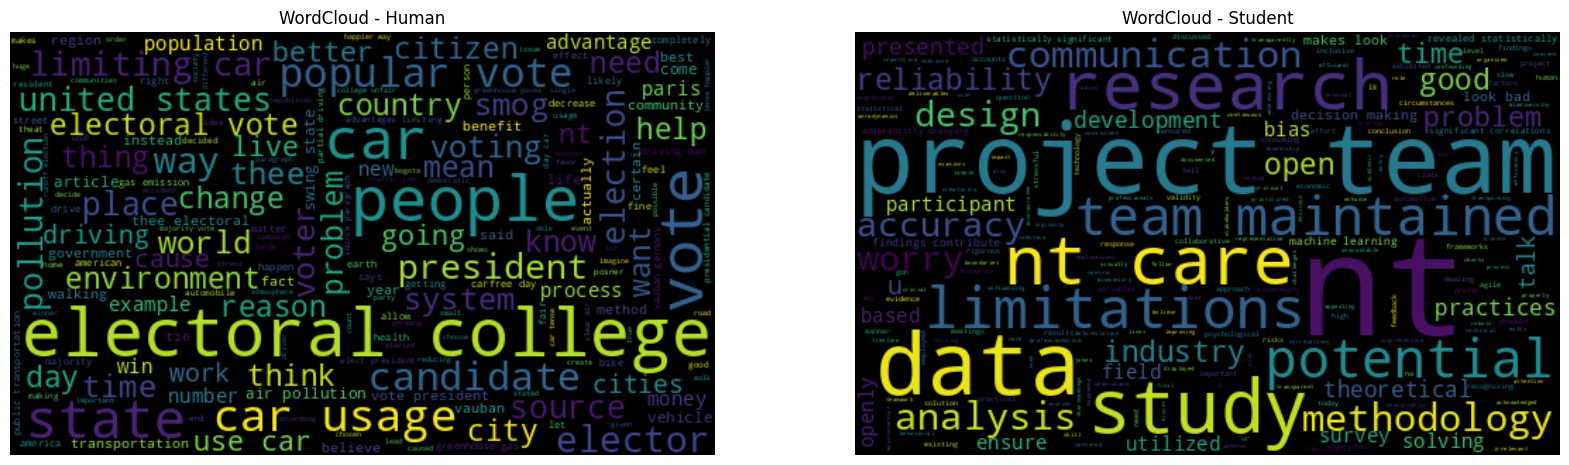

In [ ]:
# create new variables to reference our processed text (i.e., docs)
processed_docs_human = df_ai_human_processed[:100]['text']
processed_docs_student = df_ai_student_processed[:100]['text']

# create strings of feature names
str_feature_names_human = ' '.join(processed_docs_human)
str_feature_names_student = ' '.join(processed_docs_student)

# create WordClouds
word_cloud_human = WordCloud(width=500, height=300, random_state=0, max_font_size=100).generate(str_feature_names_human)
word_cloud_student = WordCloud(width=500, height=300, random_state=0, max_font_size=100).generate(str_feature_names_student)

# create and display wordclouds
# create subplots
plt.figure(figsize=(20, 6))

# wordcloud - human
plt.subplot(1, 2, 1)
plt.imshow(word_cloud_human, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Human')

# wordcloud - student
plt.subplot(1, 2, 2)
plt.imshow(word_cloud_student, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Student')

# show plot
plt.show()